# Description

Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

# Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



In [1]:
# import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # train_test_split is needed 
from sklearn.preprocessing import MinMaxScaler # for normalisation or standardisation 
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Loan_Modelling.csv')

In [3]:
#To check few rows in the dataset

df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#To check the random sample of the Data

df.sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2696,2697,63,37,78,91711,4,1.7,3,0,0,0,0,1,0
3168,3169,51,25,180,94701,1,1.7,1,0,0,0,0,1,0
1214,1215,61,36,15,92521,4,0.4,2,0,0,0,0,0,0
417,418,53,29,83,90073,4,1.0,2,0,0,0,0,1,0
1344,1345,49,25,93,93117,1,2.7,1,0,0,1,0,1,0
1599,1600,50,24,124,93305,1,4.9,1,266,0,0,0,1,0
3673,3674,34,9,65,95134,4,1.3,1,0,0,0,0,0,1
4171,4172,58,31,49,94521,4,2.5,2,0,0,0,0,1,0
4778,4779,52,27,22,90755,4,0.8,1,0,0,0,0,1,1
2358,2359,53,27,63,93109,2,0.8,3,0,0,1,0,1,0


In [5]:
#To check the details of the our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Based on the provided data information, the dataset consists of 13 columns containing integer values and 1 column containing floating-point values.

In [6]:
#To check the columns of the dataset

df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
#to check the dimentions of the dataset

df.shape

(5000, 14)

it shows the data contains 14 columns and 5000 rows

In [8]:
#To check for the missing values 

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#To check for dublicate in the dataset

df.duplicated().sum()

0

In [10]:
#To check the descriptive analysis of the data

df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Checking each column for there unique values

# ID

In [11]:
#Since the ID has no effect and implication on the dataset it will be drop

df = df.drop('ID', axis=1)

# Age

In [12]:
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

# Experience

In [13]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [14]:
#To check the rows with the negative values

negative_values = [-1, -3, -4]

filter_df = df[df['Experience'].isin(negative_values)]

In [15]:
filter_df

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
649,25,-1,82,92677,4,2.10,3,0,0,0,0,1,0
670,23,-1,61,92374,4,2.60,1,239,0,0,0,1,0
686,24,-1,38,92612,4,0.60,2,0,0,0,0,1,0


In [16]:
#To get the total number of the negative values

negative_counts = (df['Experience'] < 0).sum()

negative_counts

52

Given that it is highly unlikely for staff to have negative years of experience, any negative values in the dataset are considered erroneous and likely result from incorrect data entry. To rectify this, the negative values will be transformed into positive values, allowing us to obtain the accurate representation of the professionals' years of experience.

In [17]:
#To turn the negative value into postive

df['Experience'] = df['Experience'].abs()

In [18]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

# Income

In [19]:
df['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

# ZIP Code

In [20]:
#Since the Zip code has no effect and implication on the dataset it will be drop

df = df.drop('ZIPCode', axis=1)

# Family

In [21]:
df['Family'].unique()

array([4, 3, 1, 2], dtype=int64)

# CCAvg

In [22]:
df['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

# Education

In [23]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

# Mortgage

In [24]:
df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

# Personal_Loan

In [25]:
df['Personal_Loan'].unique()

array([0, 1], dtype=int64)

# Securities_Account

In [26]:
df['Securities_Account'].unique()

array([1, 0], dtype=int64)

# CD_Account

In [27]:
df['CD_Account'].unique()

array([0, 1], dtype=int64)

# Online

In [28]:
df['Online'].unique()

array([0, 1], dtype=int64)

# CreditCard

In [29]:
df['CreditCard'].unique()

array([0, 1], dtype=int64)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [31]:
#To check the descriptive analysis of the clean data

df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


# Data Visualization

In [32]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

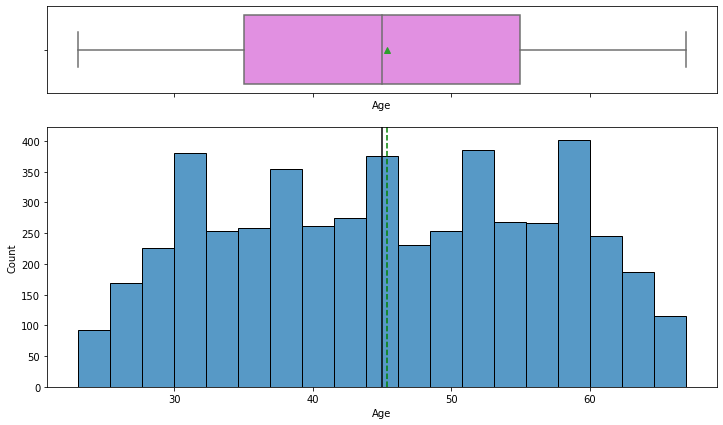

In [33]:
histogram_boxplot(data = df, feature = 'Age')

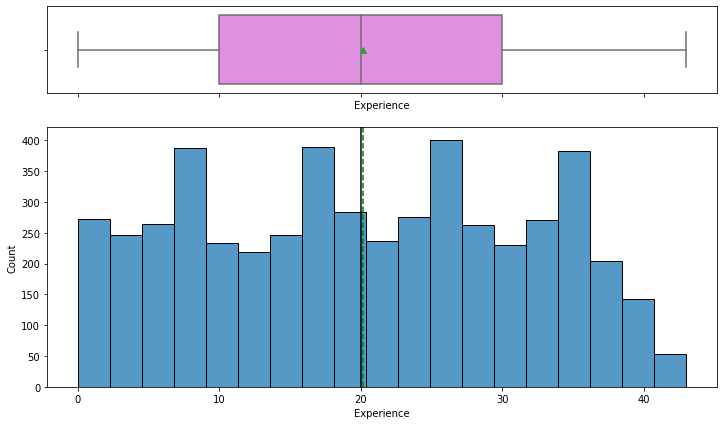

In [34]:
histogram_boxplot(data = df, feature = 'Experience')

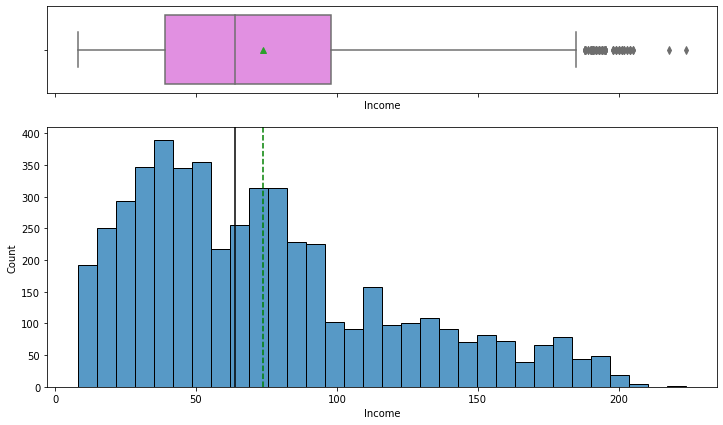

In [35]:
histogram_boxplot(data = df, feature = 'Income')

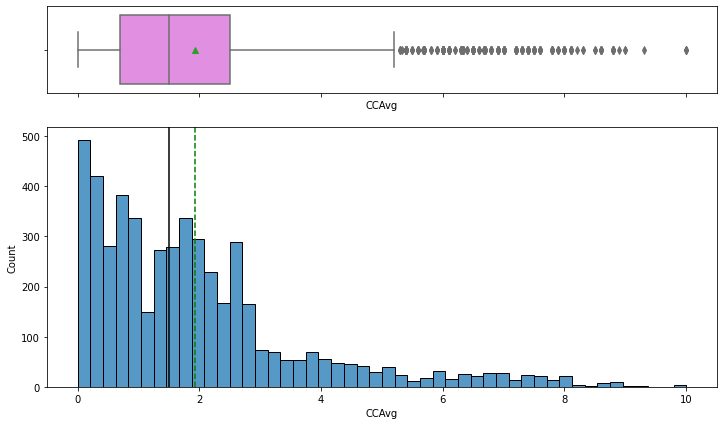

In [36]:
histogram_boxplot(data = df, feature = 'CCAvg')

# Bivariate Visualization

In [37]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

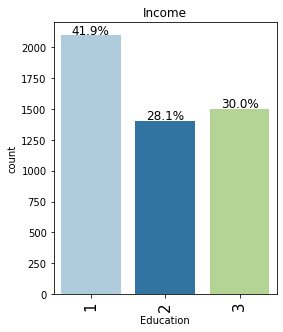

In [38]:
labeled_barplot(data = df, feature = 'Education', perc = True, title = 'Income')

The plot unveiled that individuals who possess an undergraduate education have a greater share of the overall income.

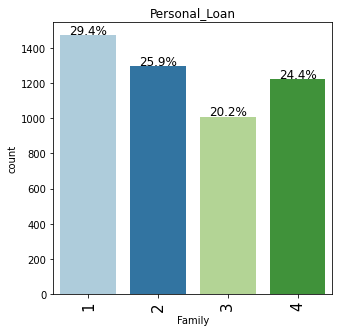

In [39]:
labeled_barplot(data = df, feature = 'Family', perc = True, title = 'Personal_Loan')

According to the plot, single-person households have a higher percentage of personal loans, accounting for 29.4%.

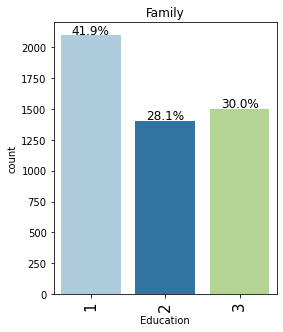

In [40]:
labeled_barplot(data = df, feature = 'Education', perc = True, title = 'Family')

In [41]:
#Function to create scatter plot bewteen to numerical features

def scatterplot(x, y, title, data = df):
    plt.figure(figsize = (6, 4))
    sns.scatterplot(x = x, y = y, data = df)
    plt.title(title)
    plt.show()

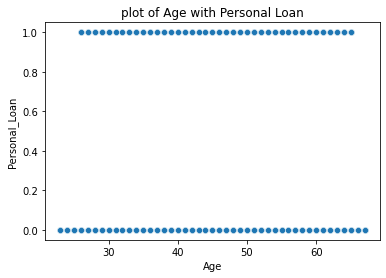

In [42]:
scatterplot(x = 'Age', y = 'Personal_Loan', title = 'plot of Age with Personal Loan')

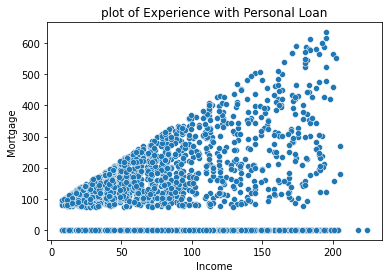

In [43]:
scatterplot(x = 'Income', y = 'Mortgage', title = 'plot of Experience with Personal Loan')

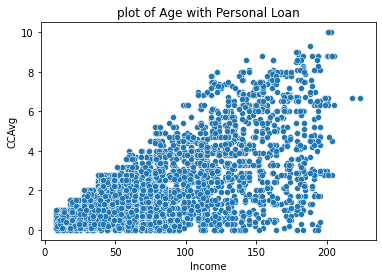

In [44]:
scatterplot(x = 'Income', y = 'CCAvg', title = 'plot of Age with Personal Loan')

# Identifying correlation

In [45]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD_Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


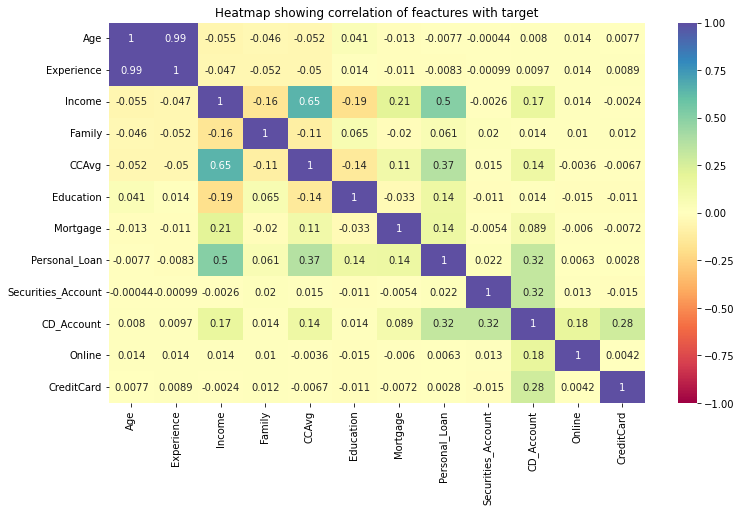

In [46]:
mat_cor = df.corr()

plt.figure(figsize = (12, 7))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.title('Heatmap showing correlation of feactures with target');

# Outlier Detection and Handling

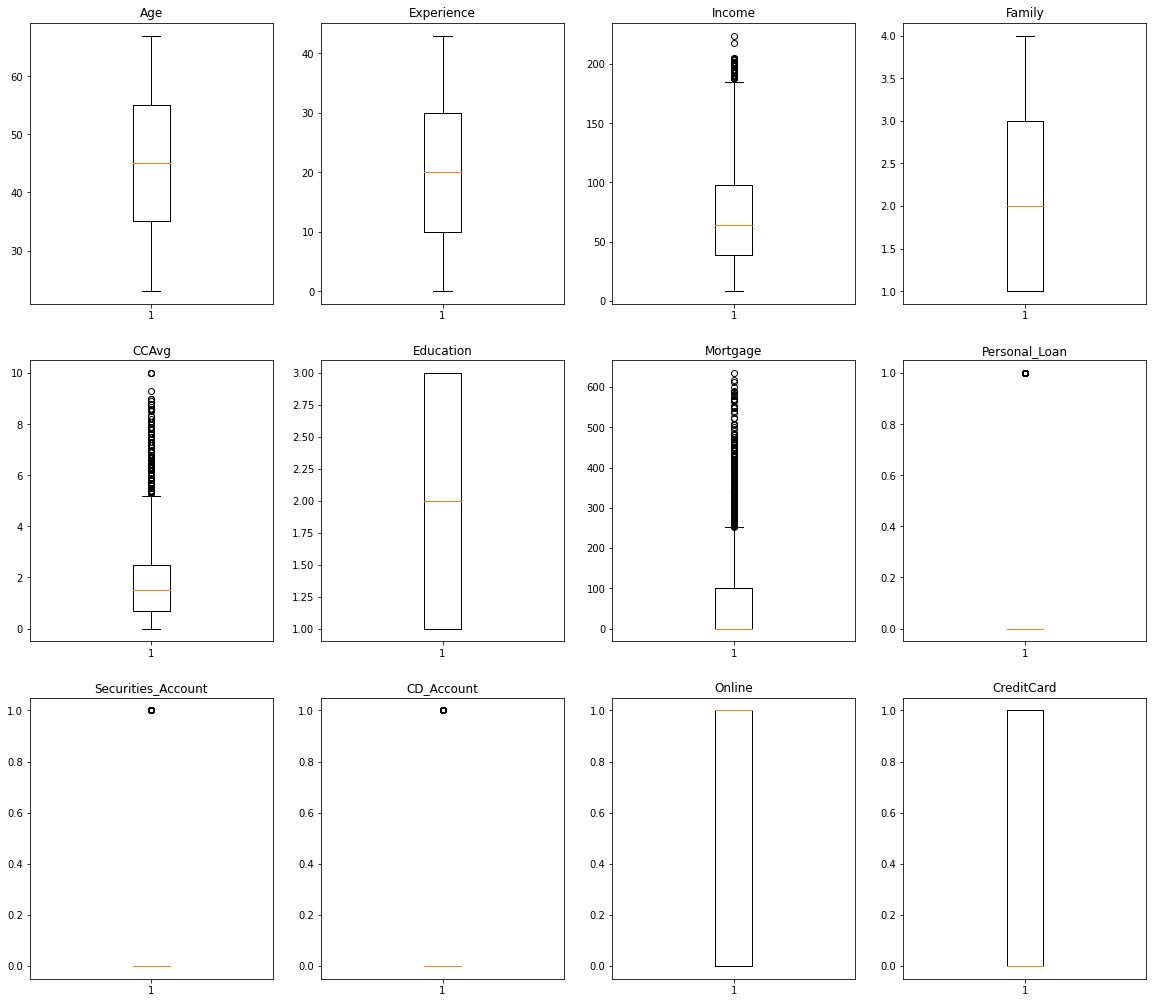

In [47]:
#To get the outlier using the boxplot

plt.figure(figsize = (20, 30))

for i, variable in enumerate(df):
    plt.subplot(5,4, 1 + i)
    plt.boxplot(df[variable])
    plt.title(variable)
plt.show()

# Outlier Treament

In [48]:
#To treat the outlier treament the Personal Loan will be drop will be the drop beacuase that is the target


# Create a list of columns to exclude
exclude_columns = ['Personal_Loan']

# Create a new DataFrame without the excluded columns
df_subset = df[[col for col in df.columns if col not in exclude_columns]]

In [49]:
df_subset

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [50]:
def treat_outliers(df_subset, col):
    '''treat the outliers in variable
    col: str, name of the numerical variable
    video_model: dataframe'''
    Q1 = df[col].quantile(0.25) #25th quantile
    Q3 = df[col].quantile(0.75) #75th quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    df_subset[col] = np.clip((df[col]), lower_whisker,upper_whisker)
    return df_subset


def treat_outliers_all(df_subset, col_list):
    for c in col_list:
        df_subset = treat_outliers(df_subset, c)
    return df_subset

In [51]:
df_subset = treat_outliers_all(df, df_subset)

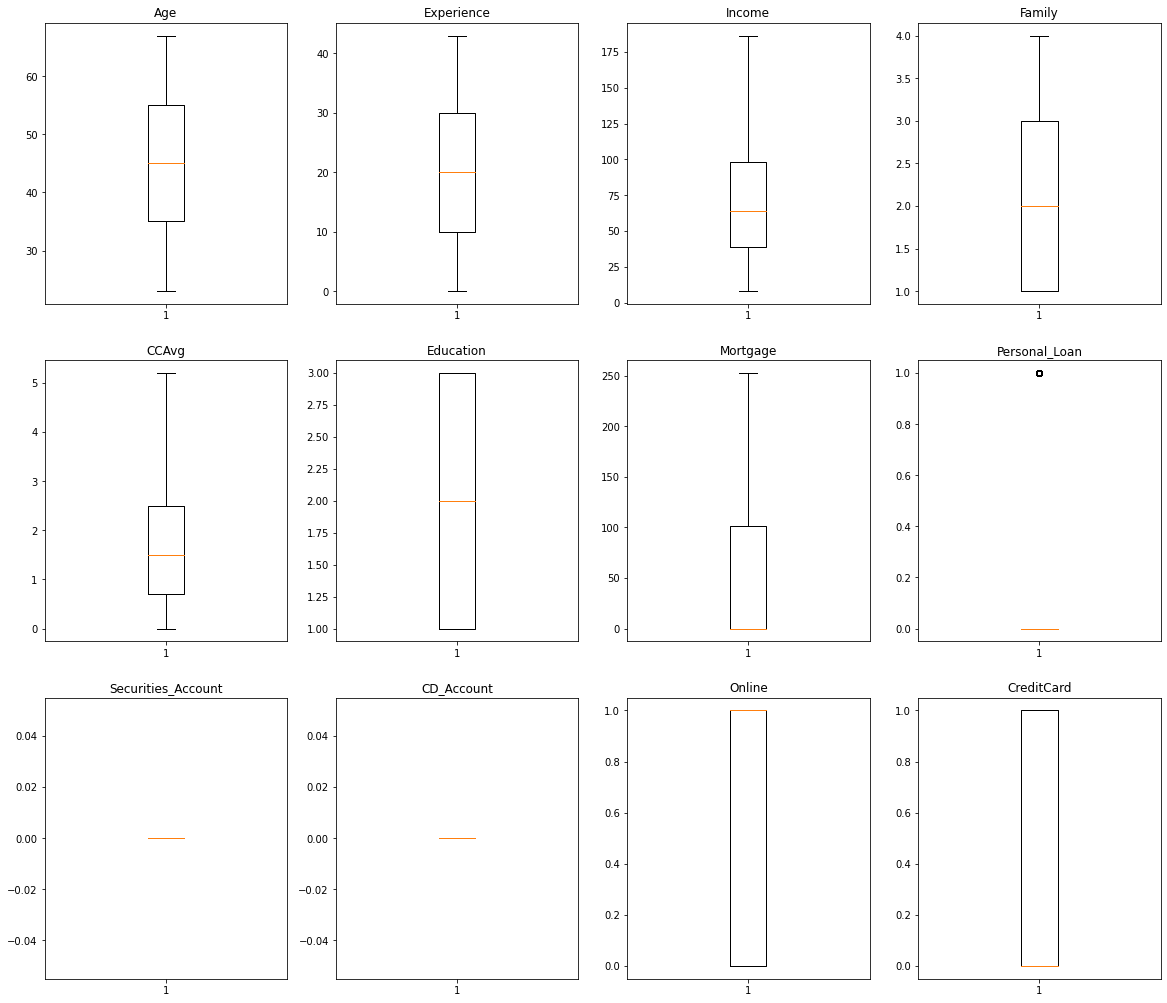

In [52]:
#To confirm and check this outliers has been treated

#To get the outlier using the boxplot

plt.figure(figsize = (20, 30))

for i, variable in enumerate(df_subset):
    plt.subplot(5,4, 1 + i)
    plt.boxplot(df[variable])
    plt.title(variable)
plt.show()

To solvethe issue of the colinearity between the Experirnce and Age from the heat map Ridge regression will be used

# Ridge Regression

In [53]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Split the data into features (X) and target variable (y)
X = df_subset  # Features (all columns except 'Personal_Loan')
y = df['Personal_Loan']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [54]:
# Perform scaling on the data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Perform Ridge regression to address collinearity
ridge = Ridge(alpha=1.0)  # Create a Ridge regression model
ridge.fit(X_train_scaled[:, [1, 2]], X_train_scaled[:, [0]])  # Fit the model to the specified features

# Obtain the transformed features using the learned coefficients
X_train_transformed = X_train_scaled.copy()
X_train_transformed[:, [1, 2]] = X_train_transformed[:, [1, 2]] @ ridge.coef_.T

X_test_transformed = X_test_scaled.copy()
X_test_transformed[:, [1, 2]] = X_test_transformed[:, [1, 2]] @ ridge.coef_.T

# Building The Model

In [56]:
#Build the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

# Perform Logistic regression with transformed features
logistic = LogisticRegression()
logistic.fit(X_train_transformed, y_train)  # Fit the model to the transformed training data

# Predict on the transformed test set
y_pred = logistic.predict(X_test_transformed)

In [57]:
logistic.score(X_train_transformed, y_train)

1.0

In [58]:
logistic.predict_proba(X_test_transformed)

array([[9.99858554e-01, 1.41445920e-04],
       [9.99881419e-01, 1.18581220e-04],
       [9.99501130e-01, 4.98870331e-04],
       ...,
       [9.99812371e-01, 1.87629212e-04],
       [9.99668952e-01, 3.31048220e-04],
       [9.99716559e-01, 2.83441313e-04]])

# Model performance check

In [59]:
#Function to compute different metrics to check performance of regression model

def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)

    # compute accuracy, recall, precision, and F1 score
    acc = accuracy_score(target, pred_class)
    recall = recall_score(target, pred_class, average="weighted")
    precision = precision_score(target, pred_class, average="weighted",zero_division=0)
    f1 = f1_score(target, pred_class, average="weighted")

    # create a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],
    )

    # create a confusion matrix
    conf = confusion_matrix(target, pred_class)

    # plot the confusion matrix with color-coded sections
    plt.figure(figsize=(8, 5))
    sns.heatmap(
        conf,
        annot=True,
        fmt="g",
        cmap=sns.color_palette("Blues", as_cmap=True),
        cbar=False,
    )
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title("Confusion Matrix", fontweight="bold")
    plt.show()

    return df_perf

# Confusion Matrix

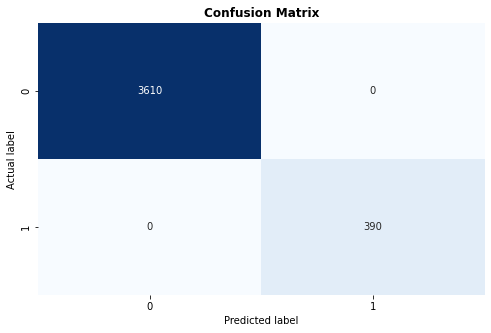

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [60]:
logistic_train = model_performance_classification(logistic, X_train_transformed, y_train)

logistic_train

TN = 390
FP = 0
TP = 3610
FN = 0

To interpret the confusion matrix:

True Positives (TP): These are the instances correctly predicted as accepting the personal loan. The model identified them correctly.

True Negatives (TN): These are the instances correctly predicted as not accepting the personal loan. The model identified them correctly.

False Positives (FP): These are the instances predicted as accepting the personal loan, but they actually did not. The model made a false positive prediction.

False Negatives (FN): These are the instances predicted as not accepting the personal loan, but they actually did. The model made a false negative prediction.

Accuracy: The accuracy of 1.0 means that the model correctly predicted all instances in the test set. It indicates that the model achieved a 100% accuracy rate in classifying whether customers accepted the personal loan or not.

Recall: The recall of 1.0 suggests that the model correctly identified all instances of customers who accepted the personal loan (class 1) without any false negatives. It means that the model captured all positive cases correctly.

Precision: The precision of 1.0 indicates that all instances predicted as accepting the personal loan (class 1) were actually correct, without any false positives. It means that the model made no incorrect positive predictions.

F1-score: The F1-score of 1.0 is the harmonic mean of precision and recall. It provides an overall measure of the model's performance, considering both precision and recall. The perfect F1-score suggests that the model achieved a perfect balance between precision and recall.

Considering the dataset, these results imply that the model was able to accurately classify whether customers accepted the personal loan or not. It achieved perfect accuracy, recall, precision, and F1-score values, indicating that the model made no misclassifications and performed exceptionally well on the given dataset.

In [61]:
from sklearn.metrics import classification_report

# Assuming you have already trained the logistic regression model and made predictions on the test set

# Generate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the classification report
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       910
           1       1.00      1.00      1.00        90

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



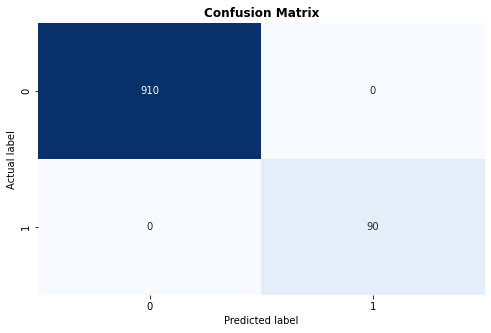

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [62]:
logistic_test = model_performance_classification(logistic, X_test_transformed, y_test)

logistic_test

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming you have X as the feature matrix and y as the target variable

# Initialize the estimator and feature selector
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=8)  # Select top 5 features

# Apply feature selection to the dataset
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]
selected_features

Index(['Age', 'Experience', 'Family', 'CCAvg', 'Education', 'Personal_Loan',
       'Online', 'CreditCard'],
      dtype='object')

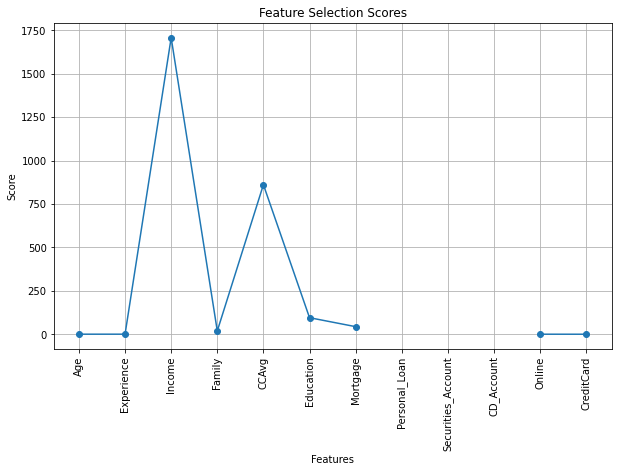

In [64]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming you have X as the feature matrix and y as the target variable

# Initialize the feature selector with the scoring function
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features

# Apply feature selection to the dataset
selector.fit(X, y)

# Get the feature scores
scores = selector.scores_

# Get the names of the features
feature_names = X.columns

# Create a line plot of feature scores
plt.figure(figsize=(10, 6))
plt.plot(feature_names, scores, marker='o')
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Selection Scores')
plt.grid(True)
plt.show()


From the feature selection it can be seen that the income, CCAvg, Education, Mortgage are significant factor to determine the instrest of the customer on personal loan

# Decision Tree

In [65]:
dtree = DecisionTreeClassifier(random_state = 0)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

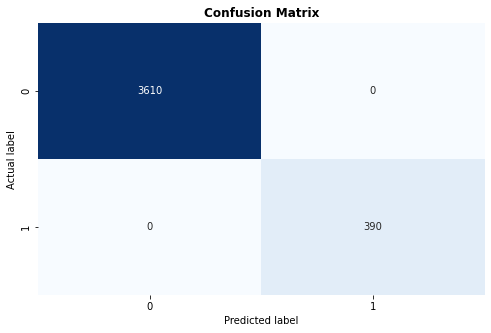

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [66]:
#Training of the model 

dtree_train = model_performance_classification(dtree, X_train, y_train)

dtree_train

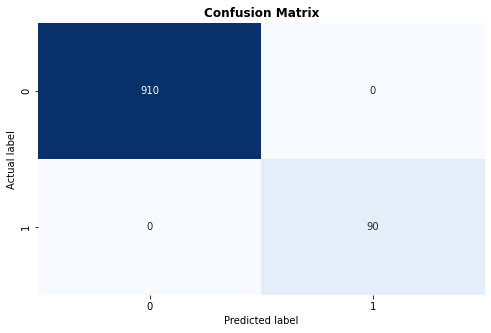

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [67]:
#testing the decision tree

dtree_test = model_performance_classification(dtree, X_test, y_test)

dtree_test

In [68]:
y.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [69]:
y_train.value_counts()

0    3610
1     390
Name: Personal_Loan, dtype: int64

Recall:That means the model is saying that out of 390 in the training data that aceepted the loan at the last campaighn the model was able to predict all of them correctly 

Precision: Out of the people the model predicted accepted the loan, the model predicted all correctly



In [70]:
from sklearn.tree import plot_tree

In [71]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
from sklearn import tree
#dtree = DecisionTreeClassifier()

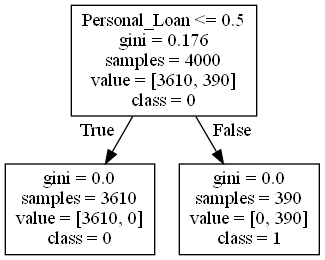

In [72]:
dot_data = tree.export_graphviz(dtree, out_file = None, feature_names = X.columns,
                               class_names=["0","1"])
# create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# create the tree image from the graph
Image(graph.create_png())

# Feature Importances

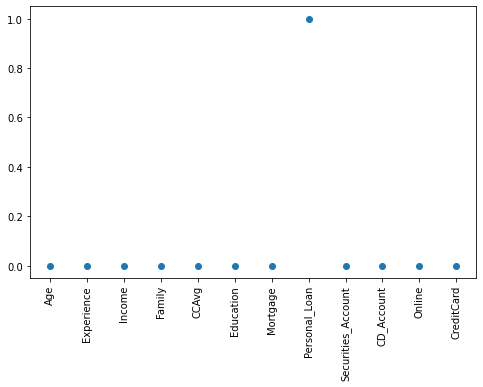

In [73]:
plt.figure(figsize = (8,5))
plt.plot(dtree.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [76]:
rf = RandomForestClassifier(random_state=0)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

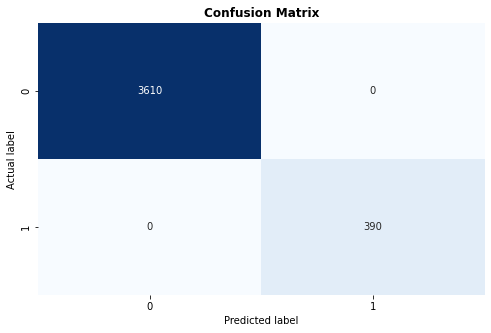

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [77]:
rf_train = model_performance_classification(rf, X_train, y_train)

rf_train

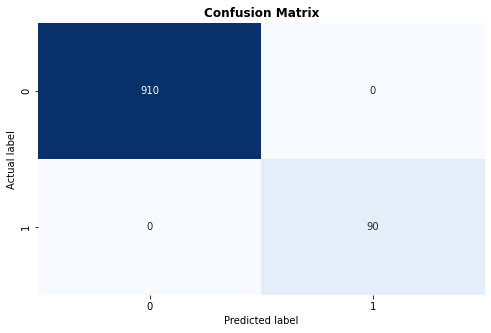

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [78]:
rf_test = model_performance_classification(rf, X_test, y_test)

rf_test

# Gradient Boosting

In [79]:
gb = GradientBoostingClassifier(random_state=0)

gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

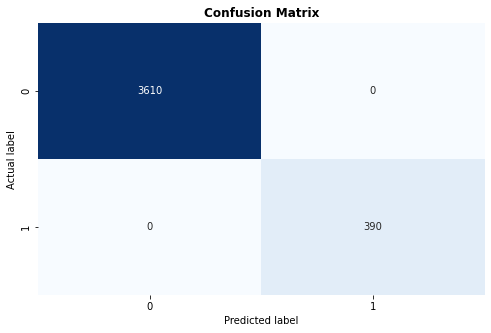

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [80]:
gb_train = model_performance_classification(gb, X_train, y_train)

gb_train

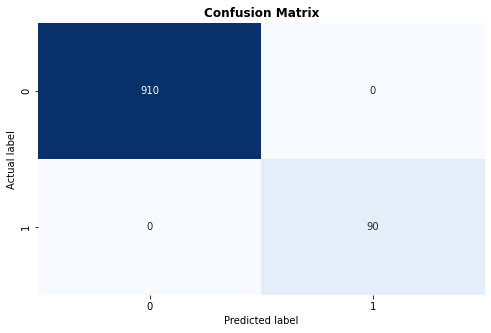

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [81]:
gb_test = model_performance_classification(gb, X_test, y_test)

gb_test